In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, join

from astropy.io import ascii
import glob, re

% matplotlib inline

import matplotlib as mpl
mpl.style.use('seaborn-colorblind')

#To make sure we have always the same matplotlib settings
#(the ones in comments are the ipython notebook settings)

mpl.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
mpl.rcParams['font.size']=18               #10 
mpl.rcParams['savefig.dpi']= 200             #72 
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12


In [3]:
fname_spc = '../data/spc_giants.csv'
fname_guy = '../data/smear_Dnu.csv'

In [4]:
spc_data = Table.read(fname_spc,format='ascii')

guy_data = Table.read(fname_guy,format='ascii')
guy_data.rename_column('Star_ID','Object')
print guy_data.keys()

['Object', 'Dnu', 'Dnu_err', 'Numax', 'Numax_err', 'eps', 'eps_err']


In [5]:
guy_data.sort('Object')
spc_data.sort('Object')

In [7]:
spc_data

Object,BJD_TDB,RV,RVerr,Teff,Teff_err,logg,logg_err,monh,monh_err,vsini,vsini_err,CCF,SNRe,n_aps,exptime,spectro,res,method
str10,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,str4,str1,str6
BD+36_3564,2457674.606693,-77.842,0.051,4300.66,50,2.064,0.1,-0.345,0.08,5.14,0.5,0.9805,71.8,3,250.0,tres,m,SPC2.9
BD+39_3577,2457670.59009,-14.809,0.07,5079.32,50,2.995,0.1,-0.114,0.08,3.98,0.5,0.9886,92.8,3,220.0,tres,m,SPC2.9
BD+42_3367,2457675.581459,-11.29,0.165,4057.12,50,2.011,0.1,-0.134,0.08,7.04,0.5,0.9642,78.2,3,180.0,tres,m,SPC2.9
BD+42_3393,2457675.584472,22.165,0.117,4100.16,50,1.917,0.1,-0.214,0.08,6.7,0.5,0.97,69.5,3,200.0,tres,m,SPC2.9
BD+43_3064,2457670.597634,-13.649,0.063,4266.04,50,2.031,0.1,-0.206,0.08,5.17,0.5,0.9791,69.2,3,250.0,tres,m,SPC2.9
BD+43_3171,2457671.586446,-16.325,0.108,4071.77,50,2.025,0.1,-0.167,0.08,5.68,0.5,0.9717,68.6,3,250.0,tres,m,SPC2.9
BD+43_3213,2457673.586228,-14.163,0.162,4131.24,50,2.074,0.1,0.073,0.08,6.24,0.5,0.9716,57.3,3,220.0,tres,m,SPC2.9
BD+48_2955,2457676.593673,1.661,0.045,4344.0,50,2.106,0.1,-0.323,0.08,4.78,0.5,0.9742,31.7,3,45.0,tres,m,SPC2.9
HD_174020,2457670.580448,-14.835,0.077,4161.69,50,1.973,0.1,-0.1,0.08,5.81,0.5,0.977,120.1,3,200.0,tres,m,SPC2.9


In [26]:
numax_sun = 3160.
numax_sun_err = 10.

Teff_sun = 5777.
logg_sun = 4.43812

In [27]:
mapping = np.array([np.where(guy_data['Object'][:]==obj)[0][0] for obj in spc_data['Object'] if (obj in guy_data['Object'])])
missing = np.array([obj not in guy_data['Object'] for obj in spc_data['Object']])

In [28]:
# new_table = join(guy_data[mapping],spc_data[~missing])
new_table = join(guy_data,spc_data)

In [45]:
spc_data['Object'].pprint(max_lines=70)

  Object  
----------
BD+36_3564
BD+39_3577
BD+42_3367
BD+42_3393
BD+43_3064
BD+43_3171
BD+43_3213
BD+48_2955
 HD_174020
 HD_174676
 HD_174829
 HD_175740
 HD_175740
 HD_175740
 HD_175740
 HD_175740
 HD_175884
 HD_176466
 HD_178797
 HD_178910
 HD_179394
 HD_179396
 HD_179959
 HD_180312
 HD_180312
 HD_180475
 HD_180658
 HD_180682
 HD_181022
 HD_181069
 HD_181097
 HD_181328
 HD_181596
 HD_181597
 HD_181681
 HD_181778
 HD_181878
 HD_181880
 HD_182531
 HD_182692
 HD_182694
 HD_183124
 HD_183203
 HD_184483
 HD_184787
 HD_185286
 HD_185351
 HD_185351
 HD_185351
 HD_185524
 HD_186121
 HD_186727
 HD_187217
 HD_187372
 HD_188537
 HD_188629
 HD_188875
 HD_188875
 HD_190149
 HD_226754
  V398_Lyr
  V546_Lyr
  V547_Lyr


In [29]:
new_table.keys()

['Object',
 'Dnu',
 'Dnu_err',
 'Numax',
 'Numax_err',
 'eps',
 'eps_err',
 'BJD_TDB',
 'RV',
 'RVerr',
 'Teff',
 'Teff_err',
 'logg',
 'logg_err',
 'monh',
 'monh_err',
 'vsini',
 'vsini_err',
 'CCF',
 'SNRe',
 'n_aps',
 'exptime',
 'spectro',
 'res',
 'method']

In [30]:
g = ((new_table['Teff']/Teff_sun)**0.5) * (new_table['Numax']/numax_sun)
log_g = np.log10(g)+logg_sun

In [31]:
new_table['logg']

2.064
2.995
2.025
2.074
2.106
1.973
2.06
2.935
2.962
2.973
2.877


## Now we do it with MCMC

In [32]:
teffs = new_table['Teff'] 
numaxes = new_table['Numax']
numax_errs = new_table['Numax_err']
N = len(teffs)

# data = dict(teff=teffs,mu_numax=numaxes,sig_numax=numax_errs,numax_sun=numax_sun,teff_sun=Teff_sun,N=N)

In [33]:
log_g = []
log_g_err = []

for j in range(N):
    thisnumax = numax_errs[j]*np.random.randn(10000)+numaxes[j]
    thislogg = np.log10((teffs[j]/Teff_sun)**0.5 * (thisnumax/numax_sun))
    log_g.append(np.mean(thislogg))
    log_g_err.append(np.std(thislogg))
    
log_g = np.array(log_g)+logg_sun
log_g_err = np.array(log_g_err)

(array([1., 8., 3., 7., 3., 5., 2., 1., 2., 2.]),
 array([ 25.40266557,  36.62603924,  47.84941291,  59.07278658,
         70.29616026,  81.51953393,  92.7429076 , 103.96628127,
        115.18965494, 126.41302861, 137.63640228]),
 <a list of 10 Patch objects>)

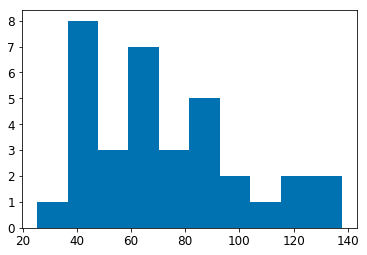

In [34]:
plt.hist(numaxes/numax_errs)

In [39]:
new_table['Object'].pprint(max_lines=40)

  Object  
----------
BD+36_3564
BD+39_3577
BD+43_3171
BD+43_3213
BD+48_2955
 HD_174020
 HD_174829
 HD_175740
 HD_175740
 HD_175740
 HD_175740
 HD_175740
 HD_175884
 HD_178797
 HD_178910
 HD_179396
 HD_180312
 HD_180312
 HD_180475
 HD_180658
 HD_180682
 HD_181022
 HD_181069
 HD_181097
 HD_181597
 HD_181778
 HD_181880
 HD_182531
 HD_182692
 HD_182694
 HD_183124
 HD_185286
 HD_188537
 HD_226754


In [36]:
output = Table({'Object':new_table['Object'],
                'numax':numaxes,
                'numax_err':numax_errs,
                'log_g':log_g,
                'log_g_err':log_g_err})
output.write('pope_asteroseismology.csv',format='csv')

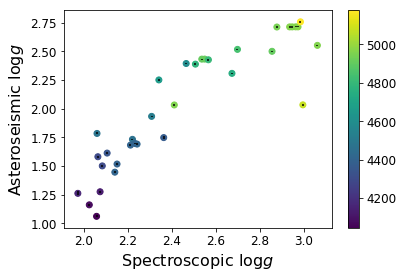

In [37]:
plt.scatter(new_table['logg'],log_g,c=new_table['Teff'])
plt.errorbar(new_table['logg'],log_g,yerr=log_g_err,linestyle='',color='k')
plt.colorbar()
plt.xlabel(r'Spectroscopic $\log{g}$')
plt.ylabel(r'Asteroseismic $\log{g}$')
plt.savefig('numax_correlation.png')

In [38]:
output

log_g_err,Object,numax_err,numax,log_g
float64,str10,float64,float64,float64
0.00845622076741466,BD+36_3564,0.09882652247868091,5.079062736733746,1.580206863345448
0.010350387620015953,BD+39_3577,0.31633186319569034,13.266855807051439,2.03328003145498
0.011431543044452564,BD+43_3171,0.05145104900196677,1.984298734336489,1.1599737529514087
0.010720461429987673,BD+43_3213,0.06325084146747773,2.5632797174106847,1.2743331041939658
0.006641807506963151,BD+48_2955,0.08331498484403516,5.440132725276065,1.6120420783932579
0.017398731268677088,HD_174020,0.09744999575175439,2.47548965209216,1.2604264508887595
0.008623404535212905,HD_174829,0.1571667547811646,7.9497984768617815,1.7835738486999473
0.005319122332991635,HD_175740,0.781397165223729,64.33345016648104,2.714002435673896
0.005221500089411699,HD_175740,0.781397165223729,64.33345016648104,2.7142907094414417
